# Big-O Informal Introduction

Purpose: To estimate the dominant scaling behavior of an algorithm as a function of the input size.

Roughly; e.g. I want to know if I double the input size, roughly how much longer should the algorithm take compared to the original?  

Also, if I guess a function that describes how long my algorithm takes as a function of input size, what is the ratio of my algorithm's actual running time function to my guess function?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Algorithms

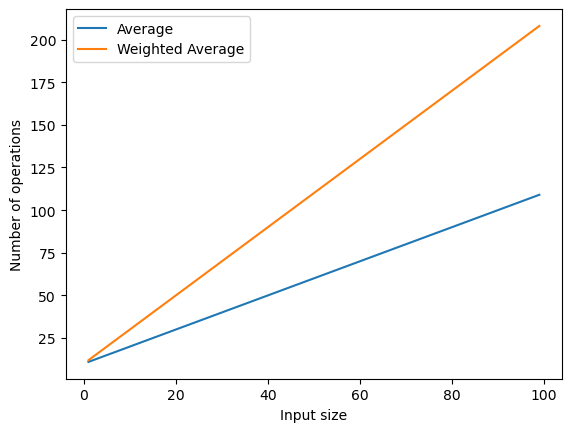

In [13]:
def get_avg(arr):
    accum = 0
    n_operations = 10
    for i in range(len(arr)):
        accum += arr[i]
        n_operations += 1
    res = accum / len(arr)
    return n_operations

def get_weighted_avg(weights, arr):
    numerator = 0
    denominator = 0
    n_operations = 10
    for i in range(len(arr)):
        numerator += weights[i]*arr[i]
        n_operations += 1
        denominator += weights[i]
        n_operations += 1
    res = numerator / denominator
    return n_operations

Ns = np.arange(1, 100)
opsavg = [get_avg(np.random.randn(N)) for N in Ns]
opsweight = [get_weighted_avg(np.random.randn(N), np.random.randn(N)) for N in Ns]
plt.plot(Ns, opsavg)
plt.plot(Ns, opsweight)
plt.xlabel("Input size")
plt.ylabel("Number of operations")
plt.legend(["Average", "Weighted Average"])

### Look at the effect of doubling input size
$ops(N) = cN$

$ops(2N) / ops(N) = c2N / cN = 2$

If we double our input size, we take twice as long
This algorithm is $O(N)$

### Look at the ratio of our number of operations to what we think dominant term is

$ops(N) / N = cN / N = c$

If I get a constant ratio, then I guessed correctly

Incorrect guess:

$ops(N) / logN = cN / logN $

Consider I add a small constsant to a linear number of operations
Suppose $ops(N) = a + cN$

$ops(N) / N = (a + cN) / N = a/N + c$

$\lim_{N \to \infty} (a + cN) / N = c$

Text(0, 0.5, 'Ratio of number of ops to N')

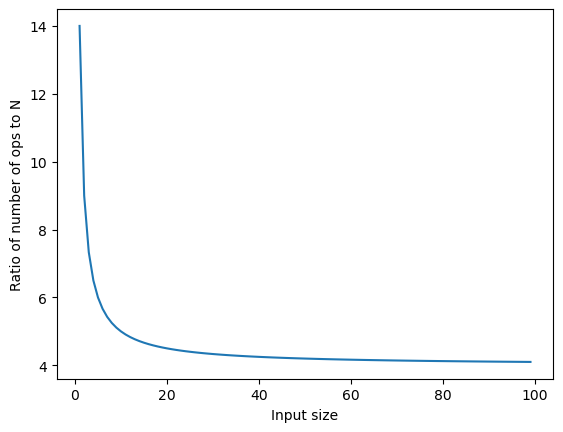

In [18]:
a = 10
c = 4
plt.plot(Ns, a/Ns + c)
plt.xlabel("Input size")
plt.ylabel("Ratio of number of ops to N")

## Quadratic Algorithms

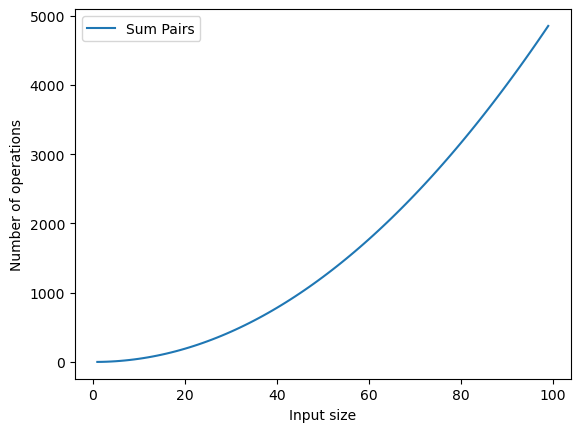

In [19]:
def sum_pairs(arr):
    accum = 0
    ops = 0
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            accum += (arr[i] + arr[j])
            ops += 1
    return ops

Ns = np.arange(1, 100)
opspairs = [sum_pairs(np.random.randn(N)) for N in Ns]

plt.plot(Ns, opspairs)
plt.xlabel("Input size")
plt.ylabel("Number of operations")
plt.legend(["Sum Pairs"])

$ops(N) = cN^2$

What happens if I double the input size?

$ops(2N)/ops(N) = c(2N)^2 / cN^2 = c4N^2 / cN^2$

I actually *quadruple* the number of operations when I double the input size, so this is worse than $N$

Ex) I timed my algorithm to take 1 hour for N=100 elements.  How long would it take for 800 elements?

I need to double 3x

4 hours for 200

16 hours for 400

64 hours for 800


Ratio of scaling function to our estimate of dominant term $N^2$

$cN^2 / N^2 = c$

Ex) Pairs example: ops(N) = N(N-1)/2 = N^2/2 - N/2

$\lim_{N \to \infty} c(N^2/2 - N/2) / N^2 = c/2$

Looking for all pairs is $O(N^2)$ algorithm


Text(0, 0.5, 'Ratio of number of ops to $N^2$')

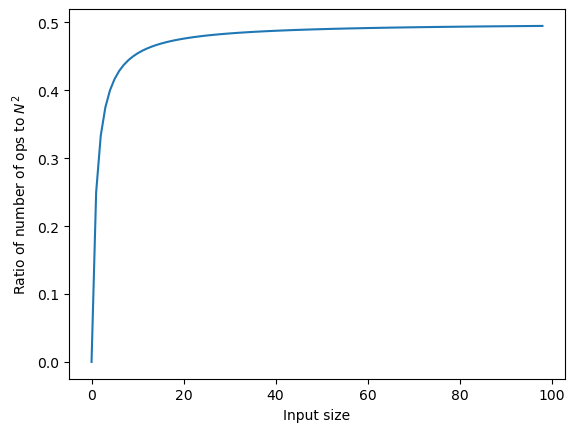

In [22]:
plt.plot( (Ns**2/2 - Ns/2) / Ns**2 )
plt.xlabel("Input size")
plt.ylabel("Ratio of number of ops to $N^2$")

# Logarithmic Algorithms

Binary search

$ops(N) = c \log_2(N)$

$ops(2N) / ops(N) = c \log_2(2N) / (c \log_2(N))$


$(c(\log_2(N) + 1)) / c \log_2(N) \approx 1$

$ops(N^2)/ops(N) \\approx 2$

Doubling does almost nothing to the number of operations for a logarithmic algorithm.  We have to square the input size to see a doubling of number of operations!  This is great!  So a dominant scaling term of $\log(N)$ is even better than a scaling term of $N$.


# NOTE: Big-O is An *Upper Bound* for the Scaling Behavior

Weighted average is $O(N)$.  This is an exact estimate, or "tight bound" of the scaling behavior

It's also true that weighted average is $O(N^2)$; this is an overestimate of the dominant term. 

Sometimes we're not able to prove the best bound necessarily, so we have to settle with an overestimate